In [1]:
%matplotlib inline

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from eli5.sklearn import PermutationImportance

In [31]:
def plot_feature_importances(importances, std, color='r', title='', labels=None):
#     indices = np.argsort(importances)[::-1]
    indices = np.arange(X.shape[1])
    
    if labels is None:
        labels = indices

    plt.figure()
    plt.title(title)
    plt.bar(range(X.shape[1]), importances[indices],
           color=color, yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), labels, rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

In [57]:
# Build a classification task using 3 informative features
dataset_info = dict(
    n_samples=2000,
    n_features=10,
    n_informative=3,
    n_redundant=2,
    n_repeated=1,
    n_classes=2,
    class_sep=0.33,
    random_state=1821,
    shuffle=False
)


X, y = make_classification(**dataset_info)

labels = (
    (['Informative'] * dataset_info['n_informative']) + 
    (['Redundant'] * dataset_info['n_redundant']) +
    (['Repeated'] * dataset_info['n_repeated'])
)
labels += ['Random'] * (dataset_info['n_features'] - len(labels))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2244)

In [51]:
forest = RandomForestClassifier(n_estimators=500,
                                random_state=0,
                                min_weight_fraction_leaf=0.005
                               )

forest.fit(X_train, y_train)
roc_auc_score(y_test, forest.predict(X_test))

0.75165991679753141

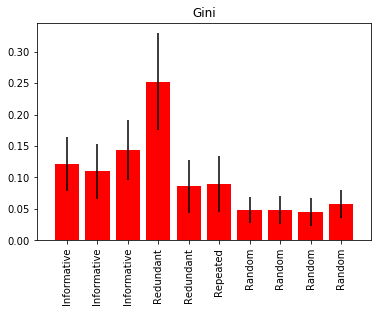

In [47]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

plot_feature_importances(importances, std, color='r', title='Gini', labels=labels)

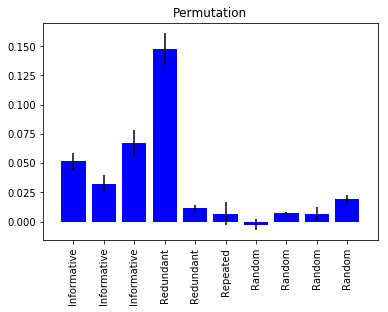

In [48]:
perm = PermutationImportance(forest).fit(X_test, y_test)
plot_feature_importances(perm.feature_importances_, perm.feature_importances_std_, color='b', 
                         title='Permutation', labels=labels)

This plot with a 1820 and 1821 split is also useful, it shows much more varied output

## What about lots of random variables?

In [118]:
y = np.zeros(2000)
y[1000:] = 1

X = np.zeros((2000, 5))

In [124]:
X[:, 0] = np.random.rand(2000)
X[:, 1] = np.random.randint(0, 100, size=2000)
X[:, 2] = np.random.randint(0, 10, size=2000)
X[:, 3] = np.random.randint(0, 5, size=2000)
X[:, 4] = np.random.randint(0, 2, size=2000)

labels = ['inf', '100', '10', '5', '2']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2244)

In [126]:
forest = RandomForestClassifier(n_estimators=500,
                                random_state=0,
                                min_weight_fraction_leaf=0.005
                               )

forest.fit(X_train, y_train)
roc_auc_score(y_test, forest.predict(X_test))

0.53235229276895946

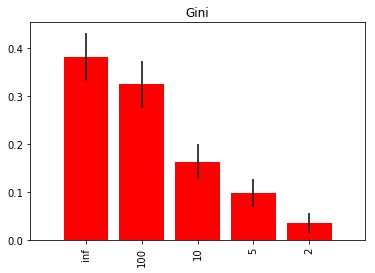

In [127]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)

plot_feature_importances(importances, std, color='r', title='Gini', labels=labels)

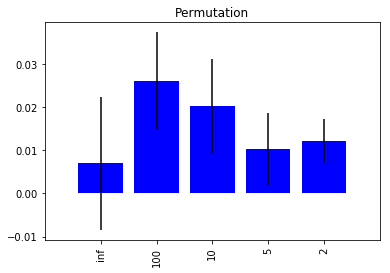

In [128]:
perm = PermutationImportance(forest).fit(X_test, y_test)
plot_feature_importances(perm.feature_importances_, perm.feature_importances_std_, color='b', 
                         title='Permutation', labels=labels)